In [13]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

In [14]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

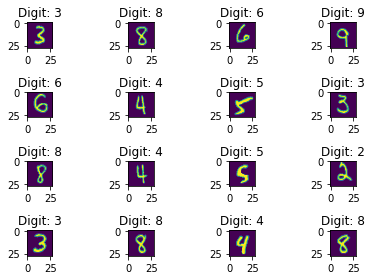

In [15]:
fig = plt.figure()
for i in range(16):
  plt.subplot(4,4,i+1)
  plt.tight_layout()
  plt.imshow(X_train[50000+i])
  plt.title(f"Digit: {y_train[50000+i]}")

In [16]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [17]:
X_train = X_train / 255
X_test = X_test / 255


In [18]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [19]:
y_test = np_utils.to_categorical(y_test, 10)
y_train = np_utils.to_categorical(y_train, 10)

In [20]:
model = Sequential()
model.add(Dense(300, input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


In [21]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='Nadam')

In [22]:
his = model.fit(X_train, y_train, batch_size = 100, epochs=10, validation_data=(X_test, y_test)) 

Epoch 1/10
600/600 [==============================] - 7s 10ms/step - loss: 0.5056 - accuracy: 0.8478 - val_loss: 0.1112 - val_accuracy: 0.9664
Epoch 2/10
600/600 [==============================] - 5s 9ms/step - loss: 0.1195 - accuracy: 0.9627 - val_loss: 0.0859 - val_accuracy: 0.9728
Epoch 3/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0831 - accuracy: 0.9745 - val_loss: 0.0717 - val_accuracy: 0.9772
Epoch 4/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0608 - accuracy: 0.9800 - val_loss: 0.0762 - val_accuracy: 0.9764
Epoch 5/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.0642 - val_accuracy: 0.9797
Epoch 6/10
600/600 [==============================] - 6s 9ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0643 - val_accuracy: 0.9812
Epoch 7/10
600/600 [==============================] - 5s 9ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.0638 - val_accuracy: 0.9810
Epoch

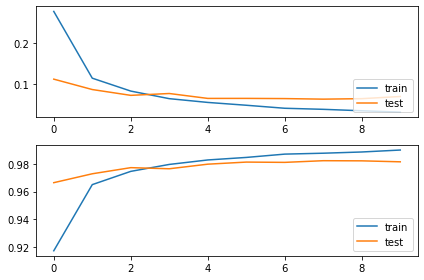

In [23]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(his.history['loss'])
plt.plot(his.history["val_loss"])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(his.history['accuracy'])
plt.plot(his.history["val_accuracy"])
plt.legend(['train', 'test'], loc='lower right')

plt.tight_layout()

In [24]:
#Evaluating model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Testing Loss of Model = ', loss)
print('Testing Accuracy of Model = ',acc)

Testing Loss of Model =  0.0688786655664444
Testing Accuracy of Model =  0.9814000129699707
